   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.7 MB/s eta 0:00:00
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Predicciones de cada árbol:
Instancia 1: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 2: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 3: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 4: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 5: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 6: Votos = [0. 0. 0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without


Instancia 20: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 21: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 22: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 23: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 24: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 25: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 26: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 27: Votos = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Clase Final = 0
Votación mayoritaria: {0.0: 10} -> Clase final: 0
Instancia 28: Votos = [0. 0. 0.

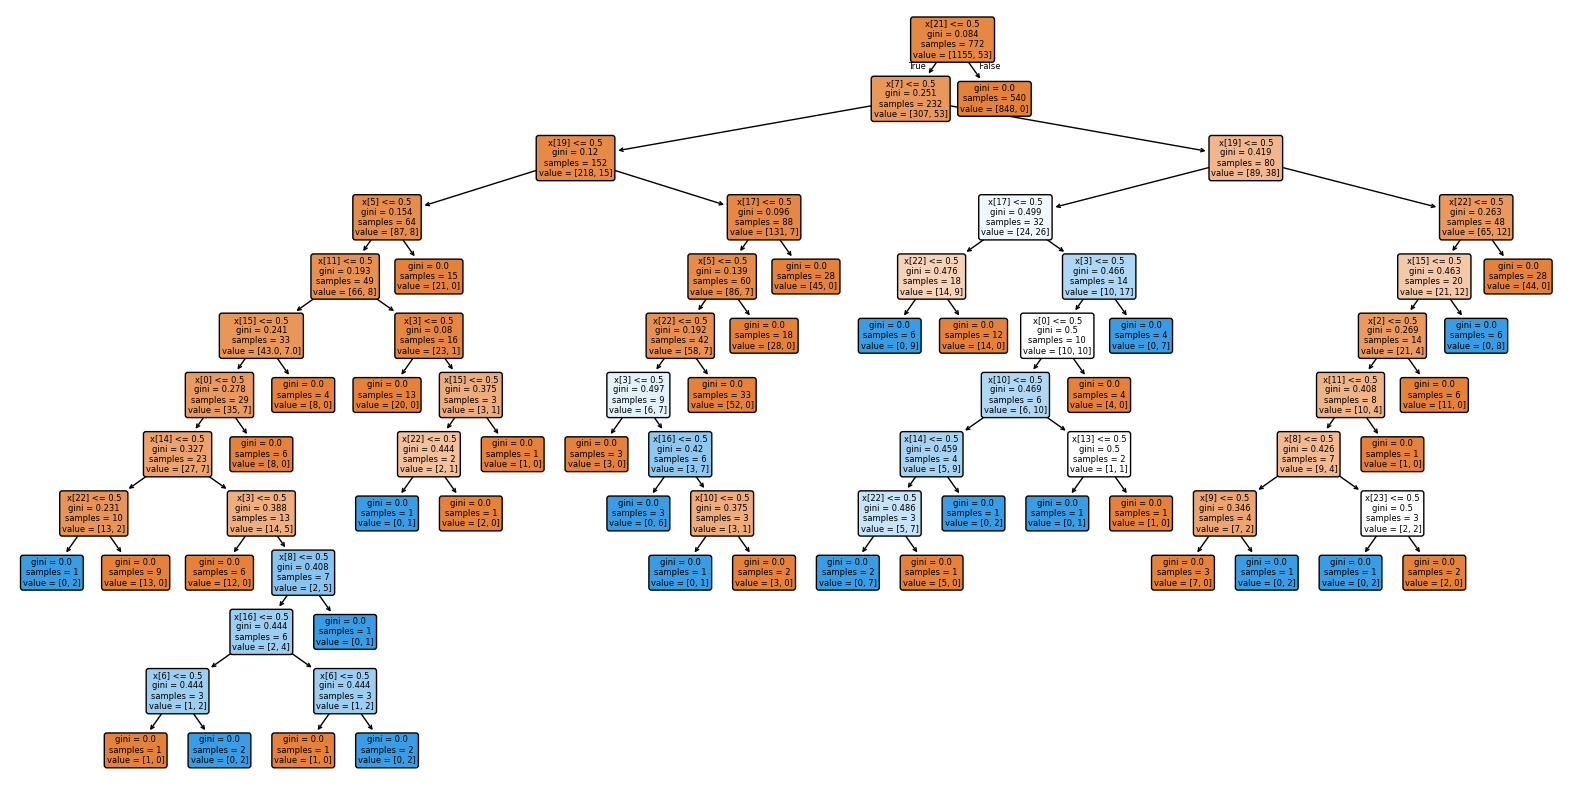

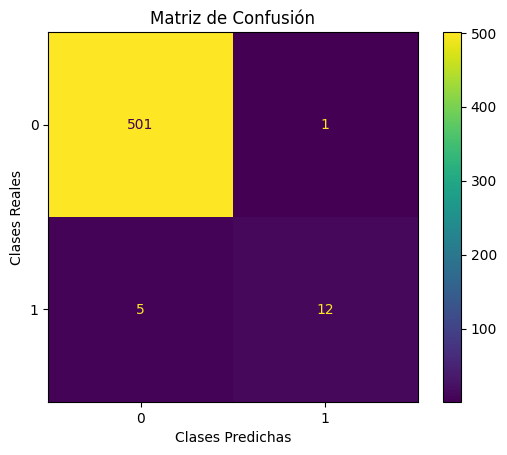

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import pydot
from io import StringIO
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
!pip install category_encoders
import category_encoders as ce

# Cargar el dataset
dat = pd.read_csv('car_evaluation.csv')
print(dat.head())  # Ver las primeras filas para identificar las columnas

# Convertir variables categóricas a numéricas usando One-Hot Encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
dat_encoded = encoder.fit_transform(dat)

# Dividir el dataset en variables independientes (X) y dependientes (y)
X = dat_encoded.iloc[:, :-1]  # Todas las columnas excepto la última
y = dat_encoded.iloc[:, -1]   # Última columna, asumiendo que esta es la etiqueta

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entrenamiento del Modelo Random Forest
# Inicializar el modelo Random Forest con 10 árboles
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = rf_model.predict(X_test)

# Obtener las predicciones de cada árbol
tree_predictions = np.array([tree.predict(X_test) for tree in rf_model.estimators_])

# Mostrar la votación de cada árbol
print("\nPredicciones de cada árbol:")
for i, pred in enumerate(tree_predictions.T):  # Transpuesta para tener las predicciones por fila
    print(f"Instancia {i + 1}: Votos = {pred}, Clase Final = {y_pred[i]}")

    # Conteo de los votos por clase
    unique, counts = np.unique(pred, return_counts=True)
    vote_count = dict(zip(unique, counts))

    print(f"Votación mayoritaria: {vote_count} -> Clase final: {y_pred[i]}")

# 3. Evaluación del Modelo
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# 4. Visualización de un Árbol de Decisión del Random Forest
# Seleccionar uno de los árboles dentro del bosque (por ejemplo, el primero)
tree_num = 0
selected_tree = rf_model.estimators_[tree_num]

# Visualización del árbol seleccionado usando matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(selected_tree, filled=True, rounded=True)
plt.show()

# 5. Exportar y Mostrar el Árbol en Formato Gráfico
dot_data = StringIO()
export_graphviz(selected_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# Mostrar el árbol como imagen
Image(graph.create_png())

# Visualización de la Matriz de Confusión
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Clases reales (usando y_test, que contiene las clases reales del conjunto de prueba)
y_true = y_test.to_numpy()

# Clases predichas por tu modelo (ya tenemos y_pred)
y_pred = y_pred

# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Ajustes visuales para hacerla más clara
plt.title("Matriz de Confusión")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.show()

